In [50]:
import os
import pandas as pd
import numpy as np
pd.options.display.max_columns=999
pd.options.display.max_rows=999

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px

from sklearn.manifold import TSNE

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

### Load & display data
We'll load the stored product embedding stored in .csv format. The embedding dimension is 500.

In [40]:
# !wget -O product_embedding_sim.zip https://www.dropbox.com/s/r9k6vibq9nrggp9/product_embedding_sim.csv.zip?dl=1
# !unzip product_embedding_sim.zip
# !wget -O product_tsne_embedding_sim.zip https://www.dropbox.com/s/jc30w291fmogj4x/product_tsne_embedding_sim.csv.zip?dl=1
# !unzip product_tsne_embedding_sim.zip

In [41]:
# load product embedding from csv file
prod_emb_df = pd.read_csv('product_embedding_sim.csv')
prod_emb_df.head()

,sku_name,cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,รีนูชิตเจลปรับอากาศกลิ่นตาฮิเตี้ยนบรีซ 198กรัม,Household & Pet,220.081020,-343.119230,-334.80768,25.136232,171.210250,-224.792310,351.846830,182.09770,-525.245240,186.216220,-26.873981,-172.01236,415.453300,123.139230,194.43870,214.07819,297.126650,46.033367,-247.58356,-86.246124,68.979640,166.008000,20.153486,284.544950,175.633620,264.258640,-268.387050,211.30693,-344.46927,294.803340,385.380550,413.981320,16.549488,-298.485000,-290.418850,-175.364440,-402.122160,-434.556300,131.87260,227.586840,167.57196,260.426850,-83.10525,-537.78210,149.060750,285.49783,-328.41110,-116.243070,472.128330,-180.16222,-24.401524,-154.20076,-9.595838,10.640272,103.865585,-139.94643,-387.497740,-209.48653,-138.865000,37.909770,-67.082535,287.52160,-88.37570,-173.327870,31.051208,134.926270,-434.69930,-332.890700,15.760967,-275.43213,-218.66414,289.612520,343.277600,78.190285,101.270325,-64.59548,57.748215,-159.38254,105.42101,449.30695,-150.27048,51.558483,177.93369,36.687530,-154.77269,91.26689,215.706010,208.187840,-107.86518,-55.248640,-152.16095,98.24156,-239.16790,195.07222,205.825330,247.601150,146.605870,35.057903,-64.498856,394.884100,314.975040,28.82472,56.528667,237.699000,-440.86053,436.00235,27.874382,-639.678160,393.103360,133.594970,-156.380420,-4.630115,208.459580,76.56813,-121.42118,158.65960,-99.35731,-412.99124,235.694170,-37.601930,-142.151730,379.35608,203.768340,-132.949000,-107.090576,320.704650,-286.885530,215.575850,-458.066830,-71.24599,-175.868740,-496.498660,-137.88698,-81.87168,-348.93190,-266.849980,195.73882,-302.95953,399.047900,168.599820,99.62632,20.08468,-346.43246,206.682160,-112.321380,-23.48741,-109.564620,-220.31932,172.247880,78.702460,-135.53374,-274.996060,-306.09125,-73.32046,426.444800,40.604805,-293.003900,249.90982,196.745990,-336.40305,216.650790,-121.941480,-88.932680,201.08250,-27.95694,-156.96268,-83.107660,-340.163270,-167.476070,-368.092740,-334.58110,407.973200,-227.798420,11.956149,-348.452580,-85.837746,193.809500,-248.057280,-144.382500,-190.699630,52.460270,-263.848820,-219.934460,-411.150670,145.594850,290.936200,125.11

In [42]:
prod_emb_df.cat.value_counts()

Health & Beauty Care           12564
Pantry & Ingredients            6220
Snacks & Desserts               5763
Household & Pet                 4658
Beverages                       3304
Fresh Food & Bakery             2409
Beer,Wine & Spirits             2027
Fruit & Vegetables              1512
Mom & Kids                      1204
Meat & Seafood                   970
International Products           352
Merit & Giftset                  276
Shop by Brands                   217
Season's Greetings               164
Food Hall Selections              13
New arrival                       12
Unicharm Brand Day                10
Tops Picks                         6
Organic Groceries                  2
Promotion Crazy Price 12.12        1
Official Brand                     1
Name: cat, dtype: int64

### Product embedding visualisation by product categories
Next we'll visualise the dimension-reduced/compressed version of product embedding using TSNE to see how product embeddings of diffrent categories lie in latent space

In [43]:
cats = ['Fruit & Vegetables','Meat & Seafood','Fresh Food & Bakery','Pantry & Ingredients','Snacks & Desserts',
       'Beverages','Beer,Wine & Spirits','Health & Beauty Care','Household & Pet','Mom & Kids']
sku_per_cat = 100
samp_dfs = []
for cat in cats: samp_dfs.append(prod_emb_df[prod_emb_df.cat==cat].sample(sku_per_cat))
samp_df = pd.concat(samp_dfs,0)
del samp_dfs

In [44]:
# 2d visualisation
tsne = TSNE(n_components=2)

tsne_decom = tsne.fit_transform(samp_df.values[:,2:])

In [45]:
tsne_df = pd.DataFrame(data=tsne_decom)
tsne_df['sku_name'] = samp_df['sku_name'].values
tsne_df['cat'] = samp_df['cat'].values

fig = px.scatter(tsne_df, x=0, y=1,color='cat', hover_data=['sku_name'],width=800,
                   height=800,opacity=0.5)
fig.show()

### Product embedding query and arithmetic
We could query similar products using product embedding for similar product recommendation. At the same time, product embeddings could be combined through arithmetic operations(+/-/*)

In [46]:
# # pre-decompose sku embedding
# tsne = TSNE()
# tsne_decom = tsne.fit_transform(prod_emb_df.values[:,2:])

# tsne_df = pd.DataFrame(data=tsne_decom)
# tsne_df['sku_name'] = prod_emb_df['name_th'].values
# tsne_df['cat'] = prod_emb_df['category_en'].values
# tsne_df.to_csv('tmp/product_tsne_embedding_collab.csv',index=False)

In [47]:
tsne_df = pd.read_csv('product_tsne_embedding_sim.csv')
tsne_df.head()

,0,1,sku_name,cat
0,-3.248915,-66.542046,รีนูชิตเจลปรับอากาศกลิ่นตาฮิเตี้ยนบรีซ 198กรัม,Household & Pet
1,23.821562,-9.613788,เอมี่ส์ชุดอาหารแผ่นแป้งข้าวโพดห่อชีสถั่วดำมะเข...,Fresh Food & Bakery
2,-30.205421,29.386438,ฟิซิเชียนส์ฟอร์มูล่าอายแชโดวชิมเมอร์สทริพคัสดอ...,Health & Beauty Care
3,-44.129820,60.448757,คงหงวนไดเจสทีพบิสกิตธัญพืช 200กรัม,Snacks & Desserts
4,33.767780,9.942325,หอยตลับ 35ถึง50ตัวต่อกก,Meat & Seafood


In [48]:
def plot_with_labels(low_dim_embs, labels, filename=None, figsize=(10,10),
                    axis_lims = None):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=figsize)  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        prop = fm.FontProperties(fname=f'THSarabunNew.ttf',size=20)
        plt.annotate(label,
                 fontproperties=prop,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    if axis_lims is not None: plt.axis(axis_lims)
    if filename: plt.savefig(filename)

Load product embedding to Gensim's KeyedVectors

In [51]:
# replace space to underscore -> for avoiding some format conversion error
prod_emb_df['sku_name'] = prod_emb_df['sku_name'].fillna('na').map(lambda x:x.replace(' ','_'))
tsne_df['sku_name'] = tsne_df['sku_name'].fillna('na').map(lambda x:x.replace(' ','_'))

os.makedirs('tmp',exist_ok=True)
# save product embedding as .txt format
prod_emb_df.drop('cat',axis=1).to_csv('tmp/product_embedding_sim.txt',sep=' ',index=False, header=False)

# convert from glove format (currently saved .txt file to word2vec format)
_ = glove2word2vec('tmp/product_embedding_sim.txt', 'tmp/product_embedding_sim_gensim.txt')

model = KeyedVectors.load_word2vec_format('tmp/product_embedding_sim_gensim.txt')

Create function fro querying full product name by text

In [52]:
# helper function for product full name query
def get_product_full_name(query, df, col):
    return df[df[col].map(lambda x:query in x)][col].values

In [53]:
get_product_full_name('โซดา',prod_emb_df,'sku_name')

array(['แดวิดอฟฟ์เอสเพรสโซดาร์กโรสต์_100กรัม',
       'เซ็นโซดายน์ยาสีฟันแรพพิดแอคชั่น_100กรัม',
       'ฮอลล์บลูโซดาลูกอมกลิ่นโซดา_224กรัม',
       'เดลี่เฟรซอโรม่าเจลผลิตภัณฑ์ปรับอากาศกลิ่นเลมอนโซดา_180กรัม',
       'ล็อตเต้เครื่องดื่มนมผสมโซดา_250มล',
       'แมนซัมฟรุตโซดาแอลกลูตาไธโอน_325มล_แพค_6',
       'บิ๊กฟอร์ดเครื่องดื่มโซดา_275มล',
       'เซ็นโซดายน์แปรงสีฟันมัลติแคร์ขนแปรงนุ่ม',
       'ชเวปส์มะนาวโซดา_330มล_แพค_24',
       'คาลพิสแลคโตะโซดาเครื่องดื่มอัดลมรสนมเปรี้ยวกลิ่นฮันนี่เลมอน_245มล',
       'นะคุนะเระจูโซคุโระแพ็คแบล็คเบคกิ้งโซดา_50กรัม',
       'เซ็นโซดายน์แปรงสีฟันรีแพร์แอนด์โพรเทคท์ขนแปรงนุ่มพิเศษ',
       'เซ็นโซดายน์แปรงสีฟันมัลติแคร์ขนแปรงนุ่ม_แพค_3',
       'เคราชิเอะลูกอมเคี้ยวหนึบรสโซดามะนาว_28กรัม',
       'เซ็นโซดายน์ยาสีฟันมัลติแคร์_160กรัม_แพค_2',
       'เอสเพลย์กลิ่นครีมโซดา_515มล_แพค_24',
       'เอสเพลย์กลิ่นครีมโซดา_515มล', 'แมกกาแรตโซดาผง_300กรัม',
       'แมนซัมฟรุตโซดาคอลลาเจน_325มล_แพค_6',
       'เซ็นโซดายน์ยาสีฟันเฟรชมินท์_160กรัม_แพ็ค2',
 

Whiskey + soda => Beer

In [28]:
model.most_similar_cosmul(positive=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล_แพค_6'],
                          topn=20)

[('สิงห์เบียร์ขวดใหญ่_620ซีซี', 0.8387982249259949),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_6', 0.8317778706550598),
 ('สิงห์เบียร์กระป๋อง_490ซีซี', 0.8223471641540527),
 ('สิงห์เบียร์ขวด_500ซีซี', 0.8207093477249146),
 ('สิงห์โซดาขวดเล็ก_325ซีซี_แพค_24', 0.8183379173278809),
 ('สิงห์เบียร์กระป๋อง_320ซีซี_แพค_24', 0.8150133490562439),
 ('สิงห์เบียร์ไลท์ขวด_620ซีซี', 0.8145329356193542),
 ('สิงห์เบียร์ขวดเล็ก_320ซีซี', 0.8121364712715149),
 ('สิงห์เบียร์กระป๋อง_490ซีซี_แพค_12', 0.8108970522880554),
 ('สิงห์โซดาขวดเล็ก_325ซีซี', 0.8063983917236328),
 ('สิงห์เบียร์ขวดใหญ่_620ซีซี_แพค_12', 0.8057827353477478),
 ('ไทเกอร์เบียร์ขวด_320มล_แพค_24', 0.7995904684066772),
 ('สิงห์เบียร์ไลท์_620ซีซี_แพค_12', 0.798416256904602),
 ('ชาวเกาะน้ำมันมะพร้าวบริสุทธิ์_200มล', 0.7980904579162598),
 ('สิงห์เบียร์ขวดเล็ก_320ซีซี_แพค_24', 0.7975991368293762),
 ('สิงห์เบียร์แคน_320ซีซี_ไอซ์_แพค_12', 0.7964433431625366),
 ('ชาวเกาะน้ำมันมะพร้าวบริสุทธิ์_400มล', 0.7946127653121948),
 ('เสือดำสุราผสม_28ดีกรี_0625ลิตร'

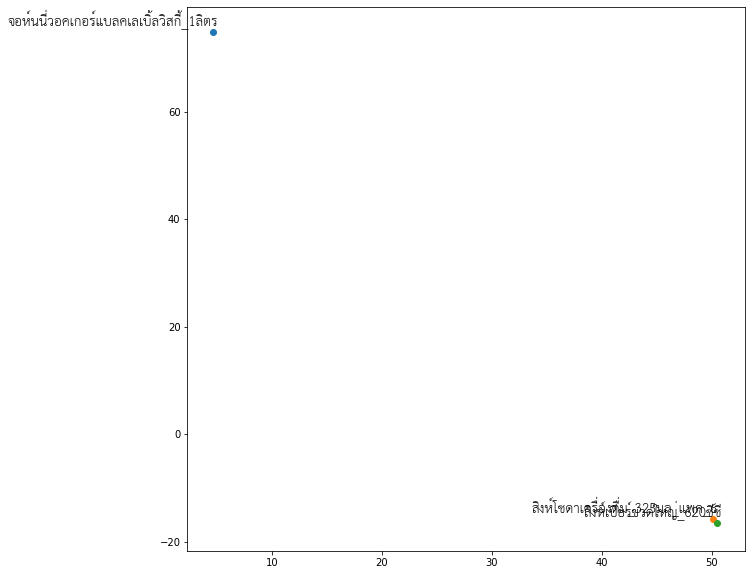

In [32]:
products=['จอห์นนี่วอคเกอร์แบลคเลเบิ้ลวิสกี้_1ลิตร','สิงห์โซดาเครื่องดื่ม_325มล_แพค_6','สิงห์เบียร์ขวดใหญ่_620ซีซี']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)

Soda + sugar => soft drink

In [27]:
model.most_similar_cosmul(positive=['สิงห์โซดาขวดเล็ก_325ซีซี','วังขนายน้ำตาลทรายแคลเซียม_500กรัม'],
                          topn=20)

[('โทมัสเฮนรี่เครื่องดื่มอัดก๊าซกลิ่นดอกเอลเดอร์_200มล', 0.745958149433136),
 ('โทมัสเฮนรี่เครื่องดื่มอัดก๊าซกลิ่นเชอร์รี่บลอสซัม_200มล',
  0.7414625883102417),
 ('ตราเสือยาหม่อง_194กรัม', 0.7382895350456238),
 ('มิตรผลน้ำเชื่อม_180มล', 0.7327777147293091),
 ('เอสโคล่า_250มล', 0.7288649678230286),
 ('เอสเครื่องดื่มอัดลมกลิ่นโคล่า_1ลิตร', 0.7262457013130188),
 ('ถูกใจน้ำมันปาล์ม_1ลิตร', 0.7257730960845947),
 ('เอสน้ำหวานกลิ่นเลมอนไลน์_16ลิตร', 0.7221303582191467),
 ('มิตรผลน้ำเชื่อม_850มล', 0.7213984131813049),
 ('เอสเพลย์เครื่องดื่มกลิ่นฮาวายเอี้ยนพันซ์_16ลิตร', 0.7213659286499023),
 ('เอสน้ำหวานกลิ่นสตรอเบอร์รี่_16ลิตร', 0.7191013693809509),
 ('เฟนติแมนส์จินเจอร์เบียร์เครื่องดื่มกลิ่นน้ำขิงอัดแก๊ส_275_มล',
  0.7143175005912781),
 ('เดอร์กี้แต่งกลิ่นรสวานิลลา_473มล', 0.7137290835380554),
 ('เอสโคล่า_515มล', 0.7136813998222351),
 ('เฟนติแมนส์จินเจอร์เอลเครื่องดื่มอัดแก๊สกลิ่นน้ำขิง_200มล',
  0.7120649814605713),
 ('ลินท็อปปิ้งกลิ่นคาราเมล_450มล', 0.7119836211204529),
 ('ชเวปส์น้ำโทนิค_3

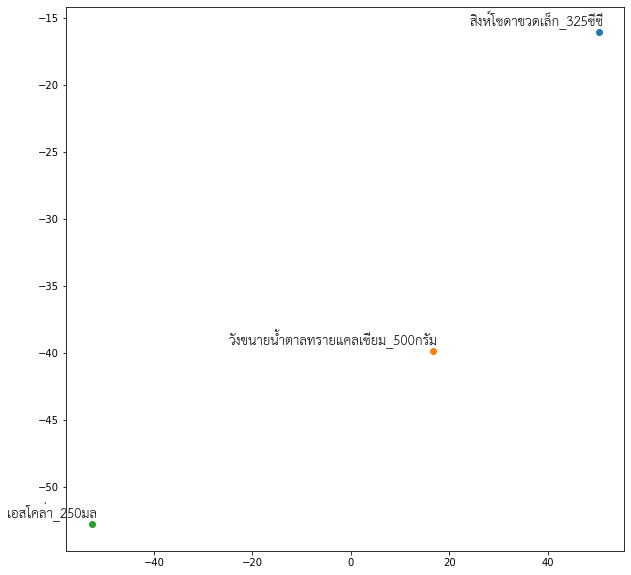

In [29]:
products=['สิงห์โซดาขวดเล็ก_325ซีซี','วังขนายน้ำตาลทรายแคลเซียม_500กรัม','เอสโคล่า_250มล']
plot_with_labels(tsne_df.set_index('sku_name').loc[products].values[:,:2],products)